<a href="https://colab.research.google.com/github/fgprevito/building-intuition/blob/main/Introduction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- The goal is to achieve intuition about linear regression
- The idea being that by going through this process of achieving intuition around linear regression and all its facets, this will help me learn how to solve problems using high quality thinking

- Make sure to carefully think through each step and why I'm doing it and what it means
- How will changes to any part of the process affect my results
- How can I make it easier to test changes that affect my inputs/outputs

Goal for this iteration:
- Thorough understanding of what we've done so far
- Add in other factors (year, sector, etc)

In [ ]:
import numpy
from matplotlib import pyplot

In [ ]:
NOISE = 0
START_YEAR = 2017
NUM_YEARS = 5

In [ ]:
co = ['Apple', 'Tesla', 'Microsoft', 'Amazon', 'Avronna']
co_map = {x:ii for (ii,x) in enumerate(co)}
co_map

{'Apple': 0, 'Tesla': 1, 'Microsoft': 2, 'Amazon': 3, 'Avronna': 4}

In [ ]:
year = numpy.arange(START_YEAR, START_YEAR + NUM_YEARS)
year_map = {x:ii for (ii,x) in enumerate(year)}
year_map

{2017: 0, 2018: 1, 2019: 2, 2020: 3, 2021: 4}

In [ ]:
acc = []

for yy in range(START_YEAR, START_YEAR + NUM_YEARS):
  for c in co:
    new_row = numpy.zeros((len(co) + len(year), ))
    new_row[co_map[c]] = 1
    new_row[year_map[yy] + len(co)] = 1
    acc.append(new_row)

design_matrix = numpy.vstack(acc)
design_matrix

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 

In [ ]:
design_matrix[5] - design_matrix[-5]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.])

3 ways to deal with rank deficient design matrix which happens when we have categorical vars
- get rid of last column (like we did with simple_design)
- set one of the factors to 0
- somehow set up penalized/regularized regression

In [ ]:
design_matrix.shape

(25, 10)

In [ ]:
# clue

numpy.linalg.matrix_rank(design_matrix)

9

In [ ]:
simple_design = design_matrix[:,:-1]
simple_design

array([[1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0.

In [ ]:
simple_design[5] - simple_design[-5]

array([0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
numpy.linalg.matrix_rank(simple_design)

9

why when we have a categorical variable I have to drop one?
Why was this not a prob in earlier sheet (with only company var)?

In [ ]:
actual_weights = numpy.random.rand(design_matrix.shape[1])
actual_weights

array([0.49438635, 0.96127607, 0.68903768, 0.37766722, 0.96271467,
       0.68329706, 0.94725229, 0.62263098, 0.15497216, 0.42624825])

In [ ]:
outcomes = numpy.dot(design_matrix, actual_weights)
outcomes

array([1.17768341, 1.64457313, 1.37233474, 1.06096427, 1.64601173,
       1.44163864, 1.90852836, 1.63628997, 1.32491951, 1.90996696,
       1.11701733, 1.58390705, 1.31166866, 1.0002982 , 1.58534565,
       0.64935851, 1.11624823, 0.84400984, 0.53263938, 1.11768683,
       0.9206346 , 1.38752432, 1.11528593, 0.80391547, 1.38896292])

In [ ]:
outcomes += (numpy.random.rand(outcomes.shape[0]) - .5) * NOISE
outcomes

array([1.17768341, 1.64457313, 1.37233474, 1.06096427, 1.64601173,
       1.44163864, 1.90852836, 1.63628997, 1.32491951, 1.90996696,
       1.11701733, 1.58390705, 1.31166866, 1.0002982 , 1.58534565,
       0.64935851, 1.11624823, 0.84400984, 0.53263938, 1.11768683,
       0.9206346 , 1.38752432, 1.11528593, 0.80391547, 1.38896292])

In [ ]:
# design_matrix[:,-1] = 0

In [ ]:
# HAT MATRIX SECTION

design_matrix.T

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
# covariance matrix

numpy.dot(design_matrix.T, design_matrix)

array([[5., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 5., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 5., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 5., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 5., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 5., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 5., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 5., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 5., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 5.]])

In [ ]:
# precision matrix
# look up mean if negs and pos

numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix))

array([[ 0.17, -0.03, -0.03, -0.03, -0.03,  0.01,  0.01,  0.01,  0.01,
         0.01],
       [-0.03,  0.17, -0.03, -0.03, -0.03,  0.01,  0.01,  0.01,  0.01,
         0.01],
       [-0.03, -0.03,  0.17, -0.03, -0.03,  0.01,  0.01,  0.01,  0.01,
         0.01],
       [-0.03, -0.03, -0.03,  0.17, -0.03,  0.01,  0.01,  0.01,  0.01,
         0.01],
       [-0.03, -0.03, -0.03, -0.03,  0.17,  0.01,  0.01,  0.01,  0.01,
         0.01],
       [ 0.01,  0.01,  0.01,  0.01,  0.01,  0.17, -0.03, -0.03, -0.03,
        -0.03],
       [ 0.01,  0.01,  0.01,  0.01,  0.01, -0.03,  0.17, -0.03, -0.03,
        -0.03],
       [ 0.01,  0.01,  0.01,  0.01,  0.01, -0.03, -0.03,  0.17, -0.03,
        -0.03],
       [ 0.01,  0.01,  0.01,  0.01,  0.01, -0.03, -0.03, -0.03,  0.17,
        -0.03],
       [ 0.01,  0.01,  0.01,  0.01,  0.01, -0.03, -0.03, -0.03, -0.03,
         0.17]])

preceision and covariance matrix are inverses of each otehr

In [ ]:
numpy.dot(numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix)), design_matrix.T)

array([[ 0.18, -0.02, -0.02, -0.02, -0.02,  0.18, -0.02, -0.02, -0.02,
        -0.02,  0.18, -0.02, -0.02, -0.02, -0.02,  0.18, -0.02, -0.02,
        -0.02, -0.02,  0.18, -0.02, -0.02, -0.02, -0.02],
       [-0.02,  0.18, -0.02, -0.02, -0.02, -0.02,  0.18, -0.02, -0.02,
        -0.02, -0.02,  0.18, -0.02, -0.02, -0.02, -0.02,  0.18, -0.02,
        -0.02, -0.02, -0.02,  0.18, -0.02, -0.02, -0.02],
       [-0.02, -0.02,  0.18, -0.02, -0.02, -0.02, -0.02,  0.18, -0.02,
        -0.02, -0.02, -0.02,  0.18, -0.02, -0.02, -0.02, -0.02,  0.18,
        -0.02, -0.02, -0.02, -0.02,  0.18, -0.02, -0.02],
       [-0.02, -0.02, -0.02,  0.18, -0.02, -0.02, -0.02, -0.02,  0.18,
        -0.02, -0.02, -0.02, -0.02,  0.18, -0.02, -0.02, -0.02, -0.02,
         0.18, -0.02, -0.02, -0.02, -0.02,  0.18, -0.02],
       [-0.02, -0.02, -0.02, -0.02,  0.18, -0.02, -0.02, -0.02, -0.02,
         0.18, -0.02, -0.02, -0.02, -0.02,  0.18, -0.02, -0.02, -0.02,
        -0.02,  0.18, -0.02, -0.02, -0.02, -0.02,  0.18],


In [ ]:
# change model to pred

pred_weights = numpy.dot(numpy.dot(numpy.linalg.pinv(numpy.dot(design_matrix.T, design_matrix)), design_matrix.T), outcomes)
pred_weights

array([0.42931823, 0.89620794, 0.62396956, 0.31259909, 0.89764655,
       0.74836518, 1.01232042, 0.68769911, 0.22004028, 0.49131638])

Text(0, 0.5, 'Predicted Weights')

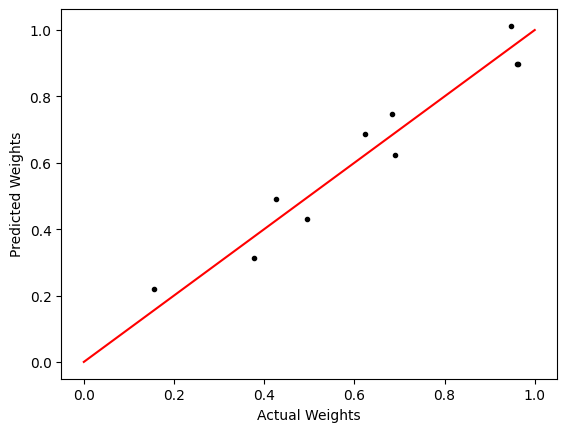

In [ ]:
pyplot.plot([0,1], [0,1], 'r-')
pyplot.plot(actual_weights, pred_weights, 'k.')

pyplot.xlabel('Actual Weights')
pyplot.ylabel('Predicted Weights')

Set of boxes of code that give information about the variables we have so far

In [ ]:
# y = mx

pred_outcomes = numpy.dot(design_matrix, pred_weights)
pred_outcomes

array([1.17768341, 1.64457313, 1.37233474, 1.06096427, 1.64601173,
       1.44163864, 1.90852836, 1.63628997, 1.32491951, 1.90996696,
       1.11701733, 1.58390705, 1.31166866, 1.0002982 , 1.58534565,
       0.64935851, 1.11624823, 0.84400984, 0.53263938, 1.11768683,
       0.9206346 , 1.38752432, 1.11528593, 0.80391547, 1.38896292])

In [ ]:
rss = numpy.mean((pred_outcomes - outcomes)**2)
rss

3.0075322011551073e-31

In [ ]:
numpy.mean(actual_weights)

0.6319482729285251

In [ ]:
numpy.var(actual_weights)

0.06766633910545204

In [ ]:
# dollar for dollar, if i estimate one paramter incorrectly, how much is the average error

numpy.mean(actual_weights - pred_weights)

-1.0824674490095276e-16

this just says give me measure of spread of how diff models weights are from actual weights
- cant do this in real life but its good for learning intuition

In [ ]:
# if my model is recapitulating my data, these should very similar
# if i have more noise, they'll be different

numpy.var(actual_weights - pred_weights)

0.004233860840352848

In [ ]:
# basically saying spread around mean is 6 cents per dollar
# if perfect this would be 0

numpy.std(actual_weights - pred_weights)

0.06506812461069435